In [ ]:
!pip install ydata_profiling wordcloud

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f7298dba46293e8b90545fcb9a5c4c0ed349e5cfc5656a5fbb7ed17b938a7dc1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
#from ydata_profiling import ProfileReport
#from

In [ ]:
df = pd.read_csv('./definitive_dataset.csv')
df.iloc[:20]

,Unnamed: 0,id,Title,Year,BoxOffice,Production,budget,genres,original_language,popularity,production_companies,revenue,runtime,Metacritic,imdb,rotten
0,0,tt20114686,Femme,2023,"$187,053",NaN,0,"[""Thriller"", ""Romance"", ""Drama""]",en,2.8926,"[""Agile Films""]",0,99,69.0,73.0,93.0
1,1,tt30467885,Goebbels and the Führer,2024,NaN,NaN,0,"[""History"", ""Drama"", ""Biography""]",de,2.1574,"[""Zeitsprung Pictures"", ""SWR"", ""act headquarte...",547033,123,NaN,67.0,NaN
2,2,tt28223926,Skincare,2024,"$456,590",NaN,0,"[""Thriller"", ""Horror"", ""Comedy"", ""Mystery"", ""D...",en,5.4150,"[""Jalapeno Goat"", ""Iervolino & Lady Bacardi En...",451381,96,NaN,57.0,69.0
3,3,tt6318608,Nightwatch: Demons Are Forever,2023,NaN,NaN,4300000,"[""Thriller"", ""Horror"", ""Mystery""]",da,33.0393,"[""Nordisk Film Denmark""]",0,117,50.0,58.0,69.0
4,4,tt6432466,Moxie,2021,NaN,NaN,0,"[""Comedy"", ""Drama"", ""Music""]",en,3.1624,"[""Paper Kite Productions""]",0,111,54.0,67.0,70.0
5,5,tt10993078,Boneyard,2024,NaN,NaN,0,"[""Action"", ""Thriller"", ""Drama"", ""Crime""]",en,4.7673,"[""Avail Entertainment"", ""One Dollar Studios"", ...",0,96,NaN,41.0,44.0
6,6,tt14849038,Vendetta,2022,NaN,NaN,0,"[""Action"", ""Thriller"", ""Crime""]",en,4.4879,"[""The Exchange"", ""308 Enterprises"", ""Bar None ...",0,96,NaN,37.0,NaN
7,7,tt26754354,The Well,2023,NaN,NaN,0,"[""Horror""]",en,5.4752,"[""Iperuranio Film""]",0,91,NaN,51.0,86.0
8,8,tt19864828,Memory,2023,"$381,052",NaN,0,"[""Drama""]",en,3.9749,"[""Teorema"", ""High Frequency Entertainment"", ""M...",313000,104,NaN,67.0,85.0
9,9,tt11525644,No Sudden Move,2021,NaN,NaN,0,"[""Thriller"", ""Mystery"", ""Drama"", ""Crime""]",en,6.1233,"[""Warner Bros. Pictures"", ""HBO Max""]",0,115,76.0,64.0,92.0


In [ ]:
df['genres'] = df['genres'].apply(json.loads)
df['production_companies'] = df['production_companies'].apply(json.loads)

In [ ]:
print(f' Total: {df.shape[0]}')
print(f' With imdb: {df[df["imdb"].notna()].shape[0]}')
print(f' With rotten tomatoes: {df[df["rotten"].notna()].shape[0]}')
print(f' With metacritic: {df[df["Metacritic"].notna()].shape[0]}')
print(f' With imdb and rotten: {df[(df["imdb"].notna()) & (df["rotten"].notna())].shape[0]}')
print(f' with revenue and budget: {df[(df["revenue"] > 0) & (df["budget"] > 0)].shape[0]}')
print(f' with only revenue: {df[(df["revenue"] > 0)].shape[0]}')
print(f' with only budget: {df[(df["budget"] > 0)].shape[0]}')
print(f' with some genre: {df[(df["genres"].apply(lambda x: isinstance(x, list) and len(x) > 0))].shape[0]}')

 Total: 9662
 With imdb: 9040
 With rotten tomatoes: 6084
 With metacritic: 4241
 With imdb and rotten: 5963
 with revenue and budget: 2056
 with only revenue: 3337
 with only budget: 2760
 with some genre: 9662


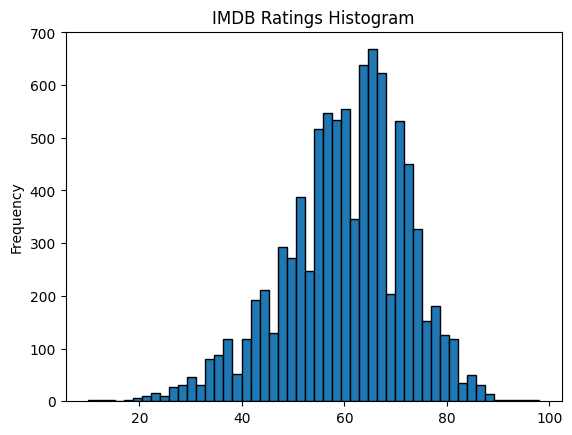

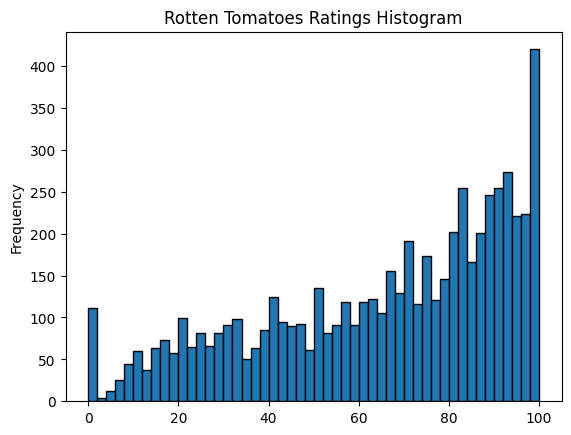

In [ ]:
df['imdb'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("IMDB Ratings Histogram")
plt.show()

df['rotten'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Rotten Tomatoes Ratings Histogram")
plt.show()

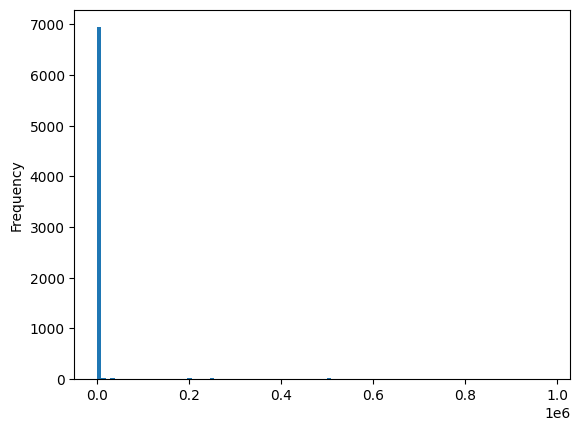

In [ ]:
df[df['budget'] < 1_000_000]['budget'].plot(kind='hist', bins=100)
plt.show()

# Titulo

In [ ]:
all_text = ' '.join(df['Title'].dropna().astype(str))

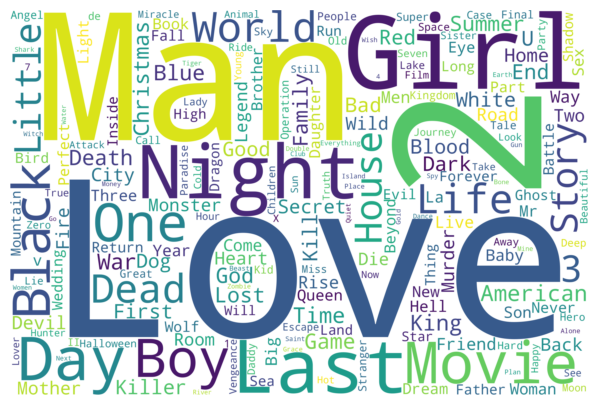

In [ ]:
wordcloud = WordCloud(width=3000, height=2000, background_color='white', include_numbers=True).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Analise dos filmes com Love

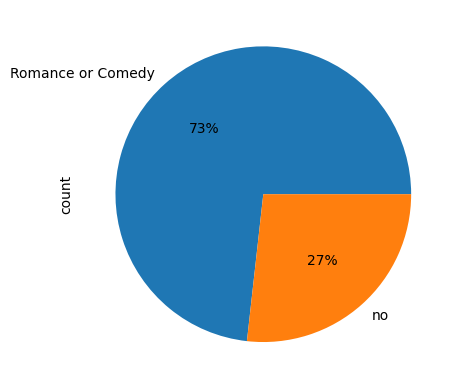

In [ ]:
filtered_df = df[df['Title'].str.contains("love", case=False, na=False)]

# filtered_df.explode('genres')['genres'].value_counts().plot(kind='pie')

#filtered_df['eh_romance'] =  filtered_df['genres']
#filtered_df['eh_romance'].map({True: 'romance', False: 'no'}).value_counts().plot(kind='pie', autopct='%1.0f%%')

#plt.show()

filtered_df['genres'].apply(lambda x: ('Romance' in x) or ('Comedy' in x)).map({True: 'Romance or Comedy', False: 'no'}).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()


# Anos, idiomas, popularidade

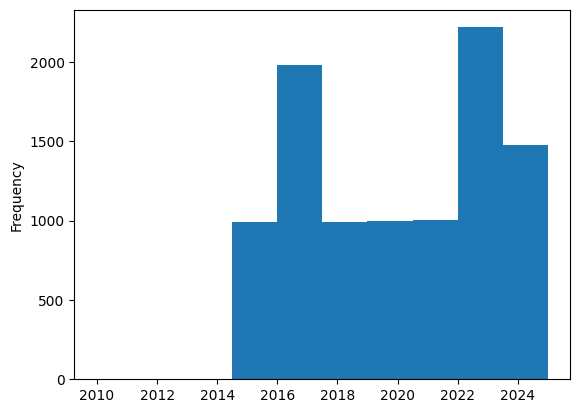

In [ ]:
df['Year'].plot(kind='bar')
plt.show()

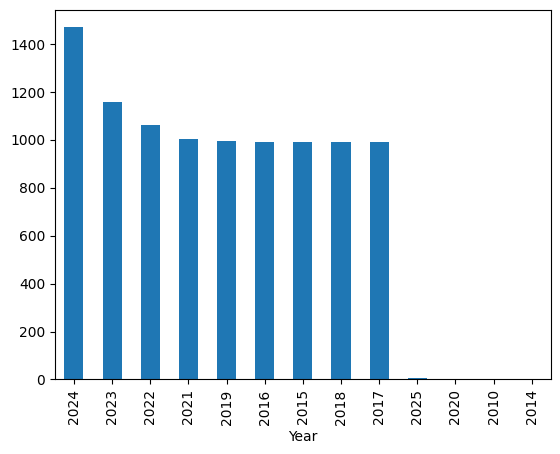

In [ ]:
df['Year'].value_counts().plot(kind='bar')
plt.show()

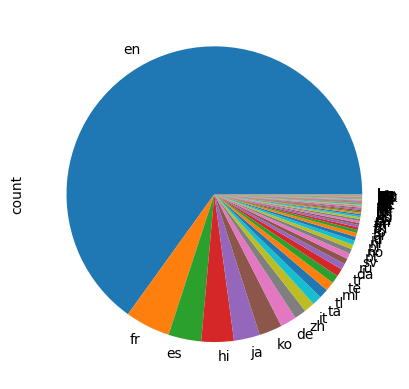

,count
original_language,
en,6287
fr,475
es,347
hi,343
ja,274
ko,244
de,170
zh,124
it,113


In [ ]:
df['original_language'].value_counts().plot(kind='pie')
plt.show()

df['original_language'].value_counts().iloc[:20]

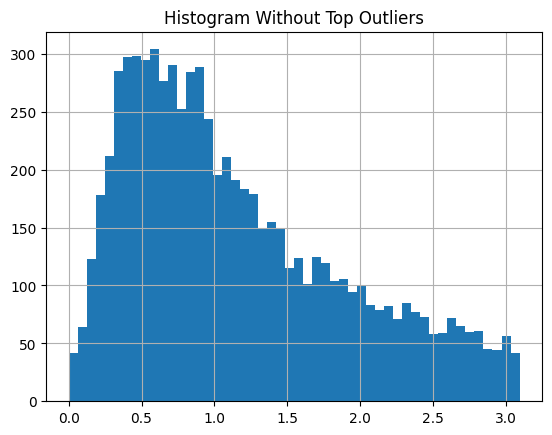

,popularity
count,9662.000000
mean,3.131298
std,8.538043
min,0.000000
25%,0.690075
50%,1.355850
75%,3.096550
max,565.734000


In [ ]:
filtered = df[df['popularity'] < df['popularity'].quantile(0.75)]
filtered.hist(column='popularity', bins=50)
plt.title("Histogram Without Top Outliers")
plt.show()


df['popularity'].describe()

# Distribuição de avaliações

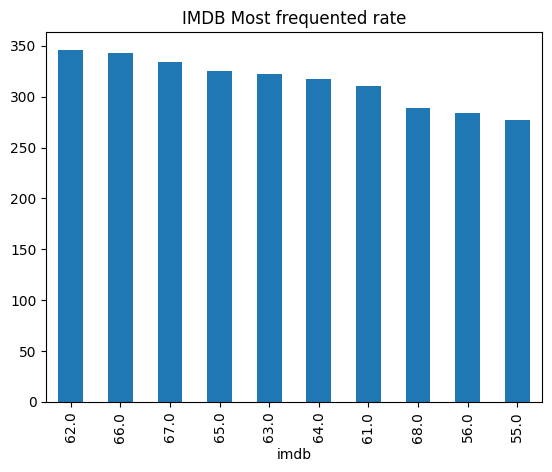

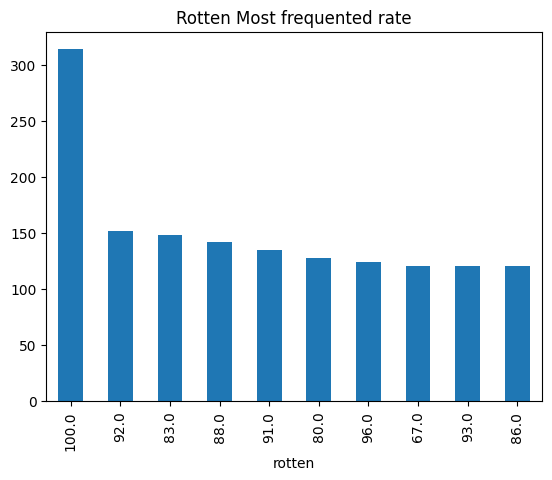

In [ ]:
df['imdb'].value_counts().iloc[0:10].plot(kind='bar', title="IMDB Most frequented rate")
plt.show()


df['rotten'].value_counts().iloc[0:10].plot(kind='bar', title="Rotten Most frequented rate")
plt.show()

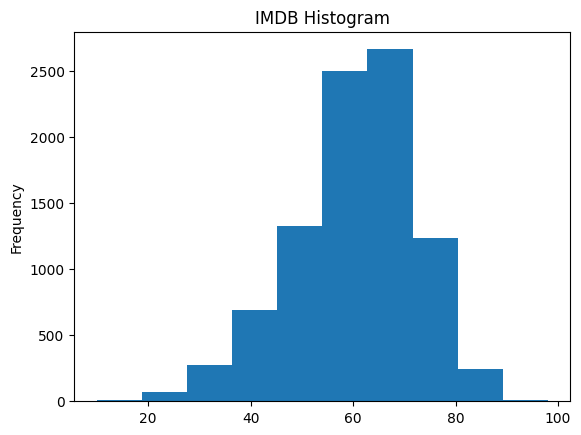

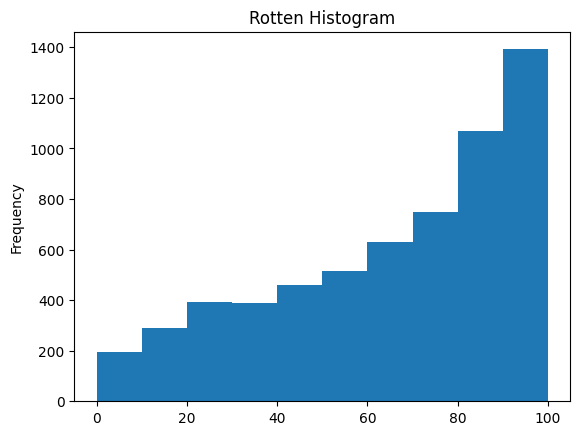

In [ ]:
# Histograms
df['imdb'].plot(kind='hist', title="IMDB Histogram")
plt.show()

df['rotten'].plot(kind='hist', title="Rotten Histogram")
plt.show()

# Relação popularidade e avaliação

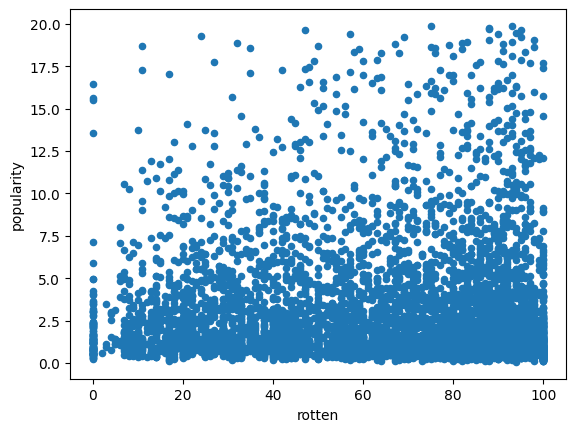

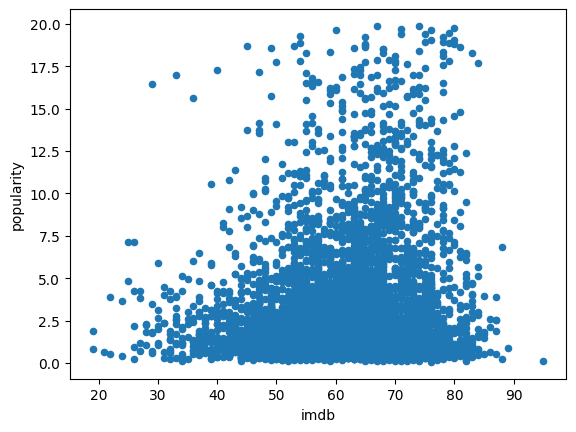

Correlation coefficient ROTTEN: -0.005492809638426468
Correlation coefficient IMDB: 0.12004990978498319


In [ ]:
pop_by_rating_df = df[(df["popularity"].notna()) & (df["rotten"].notna()) & (df["imdb"].notna()) & (df["popularity"] > 0) & (df["popularity"] < 20)]

pop_by_rating_df.plot(kind='scatter', x='rotten', y='popularity')
plt.show()

pop_by_rating_df.plot(kind='scatter', x='imdb', y='popularity')
plt.show()

correlation = pop_by_rating_df['popularity'].corr(df['rotten'])
print(f"Correlation coefficient ROTTEN: {correlation}")

correlation = pop_by_rating_df['popularity'].corr(df['imdb'])
print(f"Correlation coefficient IMDB: {correlation}")

# Relação Popularidade Retorno

In [ ]:
with_money_df = df[(df["revenue"] > 0) & (df["budget"] > 0) & (df["popularity"].notna()) & (df["popularity"] > 0) & (df["popularity"] <50)]

Correlation coefficient IMDB: 0.7290749880962829


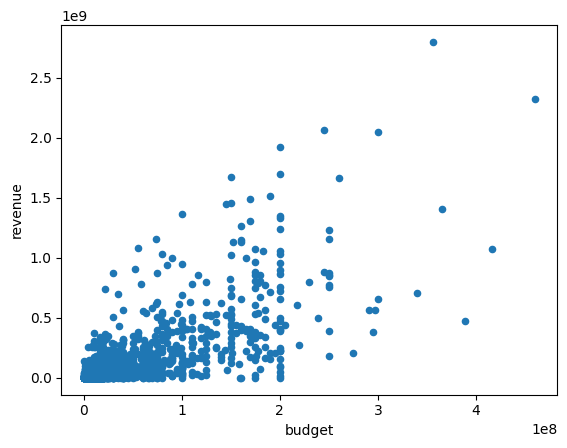

In [ ]:
with_money_df.plot(kind='scatter', x='budget', y='revenue')
correlation = pop_by_rating_df['budget'].corr(df['revenue'])
print(f"Correlation coefficient IMDB: {correlation}")

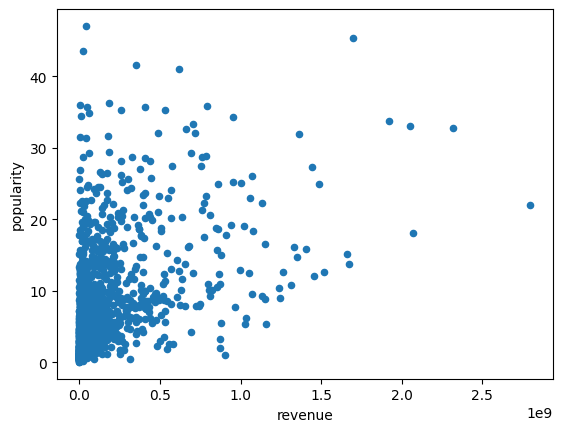

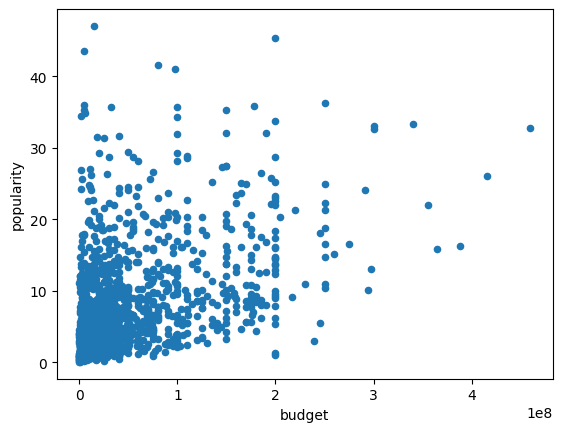

Correlation coefficient revenue: 0.4298391682348746
Correlation coefficient budget: 0.5002327264832362


In [ ]:
with_money_df.plot(kind='scatter', x='revenue', y='popularity')
plt.show()

with_money_df.plot(kind='scatter', x='budget', y='popularity')
plt.show()

correlation = pop_by_rating_df['popularity'].corr(df['revenue'])
print(f"Correlation coefficient revenue: {correlation}")

correlation = pop_by_rating_df['popularity'].corr(df['budget'])
print(f"Correlation coefficient budget: {correlation}")

# Money by genre

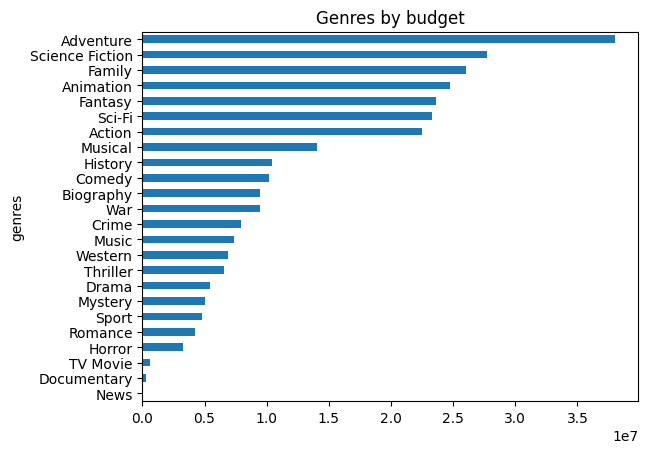

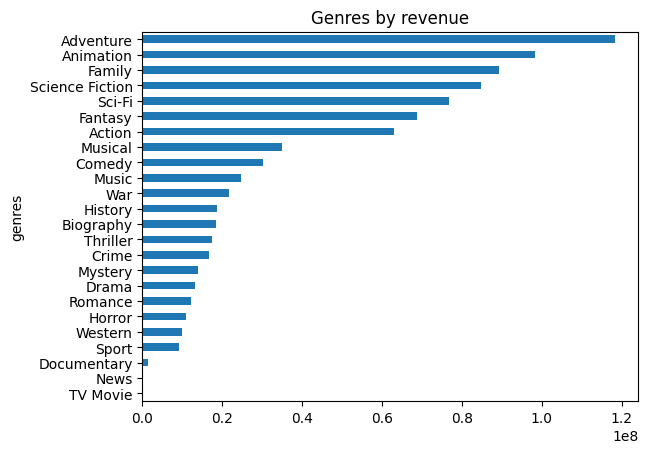

In [ ]:
genre_revenue = df.explode('genres').groupby('genres')['budget'].mean().sort_values()
genre_revenue.plot(kind='barh', title="Genres by budget")
plt.show()

genre_revenue = df.explode('genres').groupby('genres')['revenue'].mean().sort_values()
genre_revenue.plot(kind='barh', title="Genres by revenue")
plt.show()

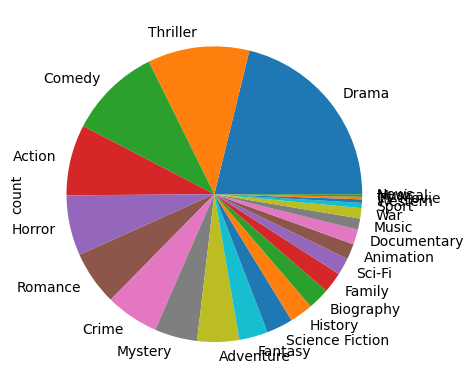

,count
genres,
Drama,5842
Thriller,3066
Comedy,2776
Action,2135
Horror,1820
Romance,1630
Crime,1606
Mystery,1286
Adventure,1264


In [ ]:
df.explode('genres')['genres'].value_counts().plot(kind='pie')
plt.show()
df.explode('genres')['genres'].value_counts()

## Weight calculus

In [ ]:
df_exploded = df.explode('genres')

# To reduce to only necessary calculus
#df_exploded = df_exploded[(df_exploded['revenue'] > 0) & (df_exploded['budget'] > 0)]

genre_freq = df_exploded['genres'].value_counts()

genre_weights = 1 / genre_freq


df_exploded['genre_w'] = df_exploded['genres'].map(lambda x: genre_weights.get(x, 0))

df_exploded['revenue_w'] = df_exploded['genre_w'] * df_exploded['revenue']
df_exploded['budget_w'] = df_exploded['genre_w'] * df_exploded['budget']


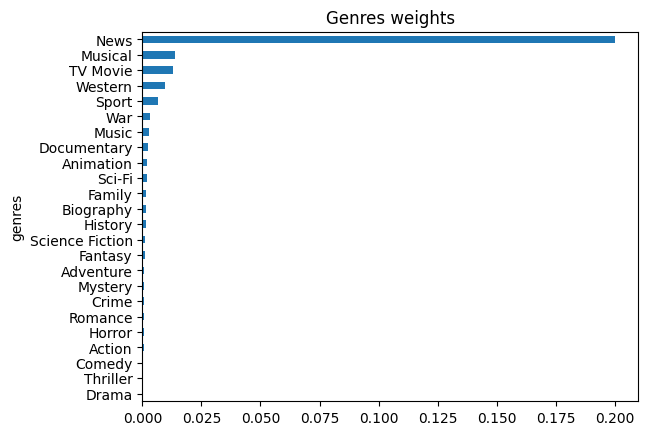

In [ ]:
# Genre weights
genre_weights.plot(kind='barh', title="Genres weights")
plt.show()

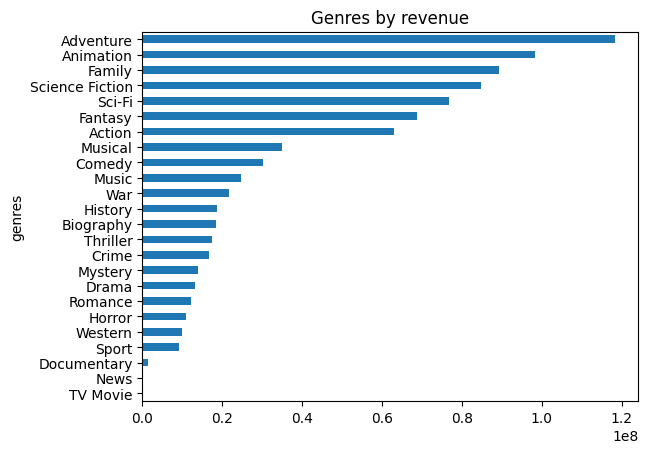

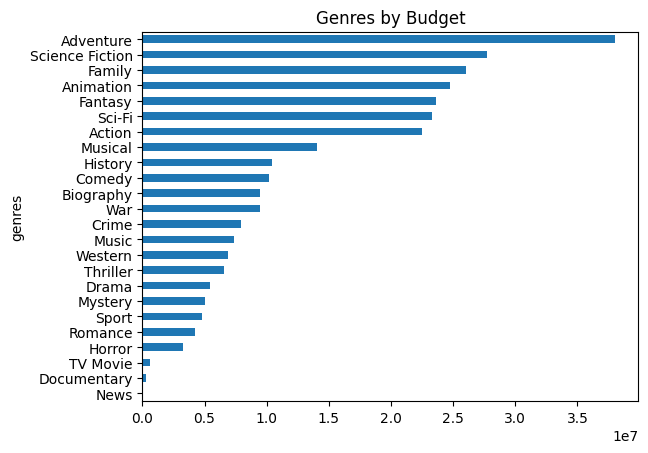

In [ ]:
genre_revenue = df_exploded.groupby('genres')['revenue_w'].sum().sort_values()
genre_revenue.plot(kind='barh', title="Genres by revenue")
plt.show()

genre_revenue = df_exploded.groupby('genres')['budget_w'].sum().sort_values()
genre_revenue.plot(kind='barh', title="Genres by Budget")
plt.show()



# Prejuizos

<ipython-input-92-ff5efafa0bad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['deu_lucro'] = ff['revenue'] > ff['budget']


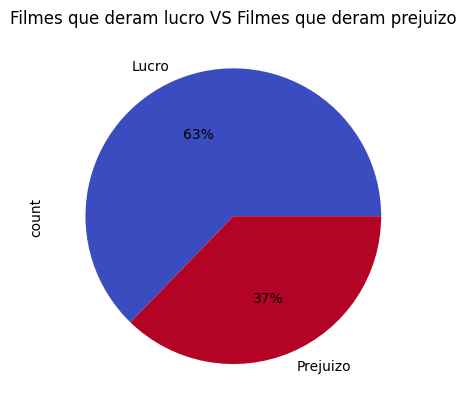

In [ ]:
ff = df[(df['revenue'].notna()) & (df['budget'].notna()) & (df['revenue'] > 0) & (df['budget'] > 0)]
#ff['profit'] = ff['revenue'] - ff['budget']


ff['deu_lucro'] = ff['revenue'] > ff['budget']


ff['deu_lucro'].map({True: 'Lucro', False: 'Prejuizo'}).value_counts().plot(kind='pie', colormap='coolwarm', autopct='%1.0f%%')
plt.title("Filmes que deram lucro VS Filmes que deram prejuizo")
plt.show()

#ff['lucro'] = ff['revenue'] - ff['budget']
#ff['lucro'].describe()


#max_lucro = ff['lucro'].quantile(0.99)
#min_lucro = ff['lucro'].quantile(0.01)

# ff[(ff["lucro"] < max_lucro) & (ff["lucro"] > min_lucro)]['lucro'].plot(kind='hist', bins=100)
#ff[(ff["lucro"] < max_lucro) & (ff["lucro"] > min_lucro)]['lucro'].describe()


<ipython-input-101-9026123ad9a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['deu_lucro'] = ff['revenue'] > ff['budget']


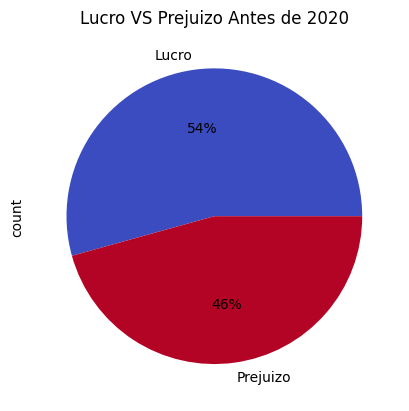

In [ ]:
ff = df[(df['revenue'].notna()) & (df['budget'].notna()) & (df['revenue'] > 0) & (df['budget'] > 0) & (df['Year'].apply(int) > 2020)]

ff['deu_lucro'] = ff['revenue'] > ff['budget']


ff['deu_lucro'].map({True: 'Lucro', False: 'Prejuizo'}).value_counts().plot(kind='pie', colormap='coolwarm', autopct='%1.0f%%')
plt.title("Lucro VS Prejuizo Antes de 2020")
plt.show()

#ff['lucro'] = ff['revenue'] - ff['budget']
#ff['lucro'].describe()


#max_lucro = ff['lucro'].quantile(0.99)
#min_lucro = ff['lucro'].quantile(0.01)

# ff[(ff["lucro"] < max_lucro) & (ff["lucro"] > min_lucro)]['lucro'].plot(kind='hist', bins=100)
#ff[(ff["lucro"] < max_lucro) & (ff["lucro"] > min_lucro)]['lucro'].describe()


# Verificar todas as relações entre variaveis para cada tipo de grupo

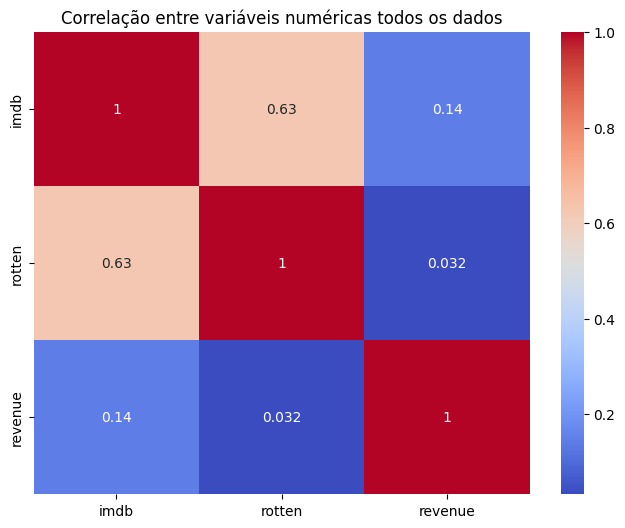

In [ ]:
numeric_cols = ['imdb', 'rotten', 'budget', 'revenue']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlação entre variáveis numéricas todos os dados")
plt.show()

In [ ]:
ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]

<ipython-input-118-b22a51c5e29d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['quantile'], bins = pd.qcut(ff['budget'], q=len(quantiles), labels=quantiles, retbins=True)


[1.0000000e+00 3.0000000e+06 5.6075000e+06 1.0000000e+07 1.5427324e+07
 2.5000000e+07 4.0000000e+07 9.0000000e+07 4.6000000e+08]
quantile
Q3    307
Q1    286
Q5    286
Q6    257
Q8    246
Q7    239
Q2    228
Q4    207
Name: count, dtype: int64


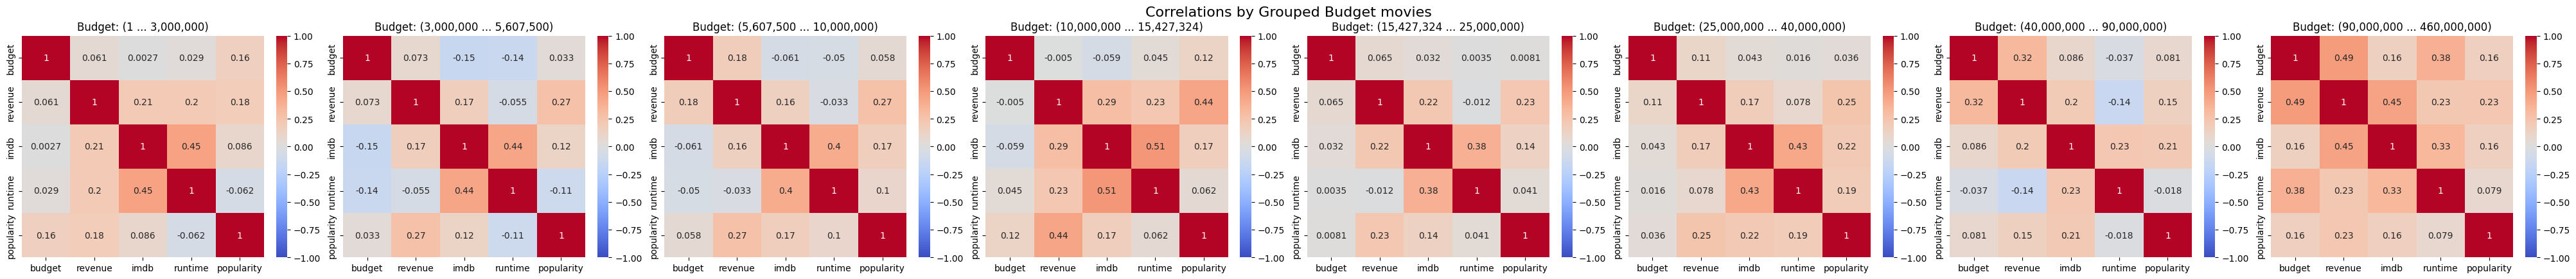

,budget
count,2.056000e+03
mean,3.702028e+07
std,5.417732e+07
min,1.000000e+00
25%,5.607500e+06
50%,1.542732e+07
75%,4.000000e+07
max,4.600000e+08


In [ ]:
quantiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

ff['quantile'], bins = pd.qcut(ff['budget'], q=len(quantiles), labels=quantiles, retbins=True)
# ff['quantile'], bins = pd.cut(ff['budget'], bins=len(quantiles), labels=quantiles, retbins=True)

print(bins)
print(ff['quantile'].value_counts())
n = len(quantiles)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

for i, q in enumerate(quantiles):
    subset = ff[(ff['quantile'] == q)][['budget', 'revenue', 'imdb', 'runtime', 'popularity']]
    corr = subset.corr()

    ax = axes[i]
    ax.set_title(f'Budget: ({int(bins[i]):,} ... {int(bins[i + 1]):,})')
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)

plt.suptitle('Correlations by Grouped Budget movies', fontsize=16, y=1.05)
plt.show()


ff['budget'].describe()

In [ ]:
most_used_genres = list(df.explode('genres')['genres'].value_counts().head(5).index)

quantiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']



for genre in most_used_genres:
  filtered = ff[ff['genres'].apply(lambda x: genre in x)]
  filtered['quantile'], bins = pd.qcut(filtered['budget'], q=len(quantiles), labels=quantiles, retbins=True)

  n = len(quantiles)

  fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

  for i, q in enumerate(quantiles):
      subset = filtered[(filtered['quantile'] == q)][['budget', 'revenue', 'imdb', 'runtime', 'popularity']]
      corr = subset.corr()

      ax = axes[i]
      sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
      ax.set_title(f'Budget: ({int(bins[i]):,} ... {int(bins[i + 1]):,})')

  plt.suptitle(f'Correlations by {genre} movies', fontsize=16, y=1.05)
  plt.show()


# Analise por quantil de Budget e generos

In [ ]:
ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]
ff.shape

(2056, 16)

In [ ]:
most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

In [ ]:
quantiles = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

## Budget e Retorno

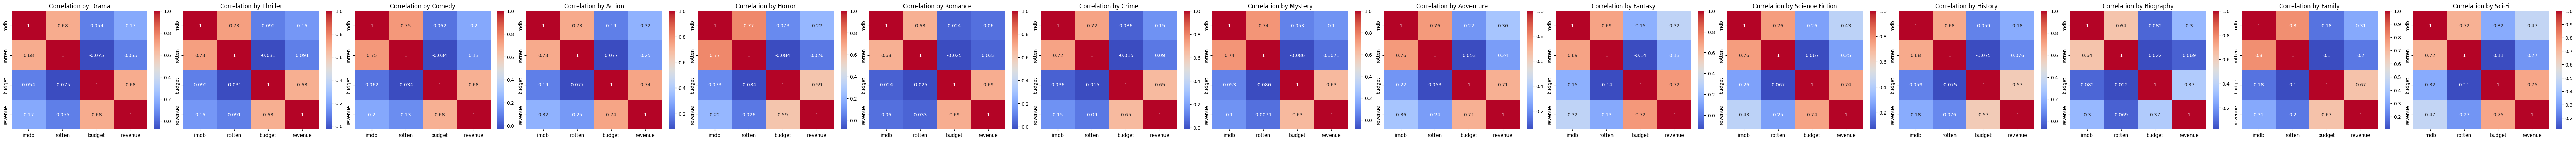

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
n = len(most_used_genres)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

for i, genre in enumerate(most_used_genres):
  filtered = ff[ff['genres'].apply(lambda x: genre in x)]

  numeric_cols = ['imdb', 'rotten', 'budget', 'revenue']
  correlation = filtered[numeric_cols].corr()

  plt.figure(figsize=(8, 6))
  ax = axes[i]
  ax.set_title(f'Correlation by {genre}')
  sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax)

plt.suptitle(f'Correlation by genre')
plt.show()


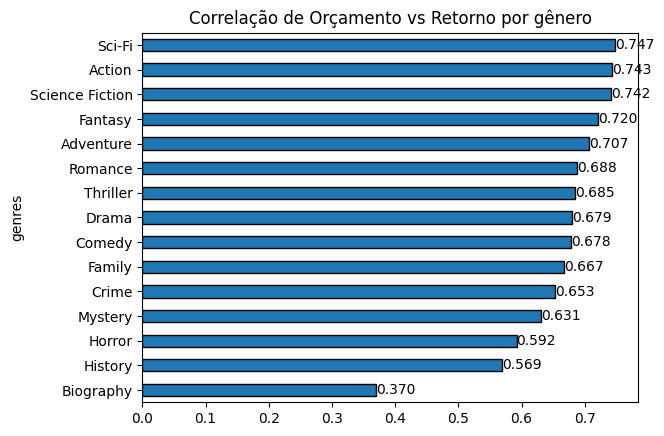

In [ ]:
ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

exploded_genre = ff.explode('genres')
exploded_genre = exploded_genre[exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

genre_revenue = exploded_genre.groupby('genres')['budget'].corr(ff['revenue']).sort_values()

import matplotlib.cm as cm
import matplotlib.colors as colors

ax = genre_revenue.plot(kind='barh', title="Correlação de Orçamento vs Retorno por gênero", edgecolor='black')
for i, v in enumerate(genre_revenue):
    ax.text(v, i, f'{v:.3f}', va='center')
plt.show()




In [ ]:
df[(df['revenue'] > 0) & (df['budget'] > 0) & (df['Year'].apply(int) < 2020)]

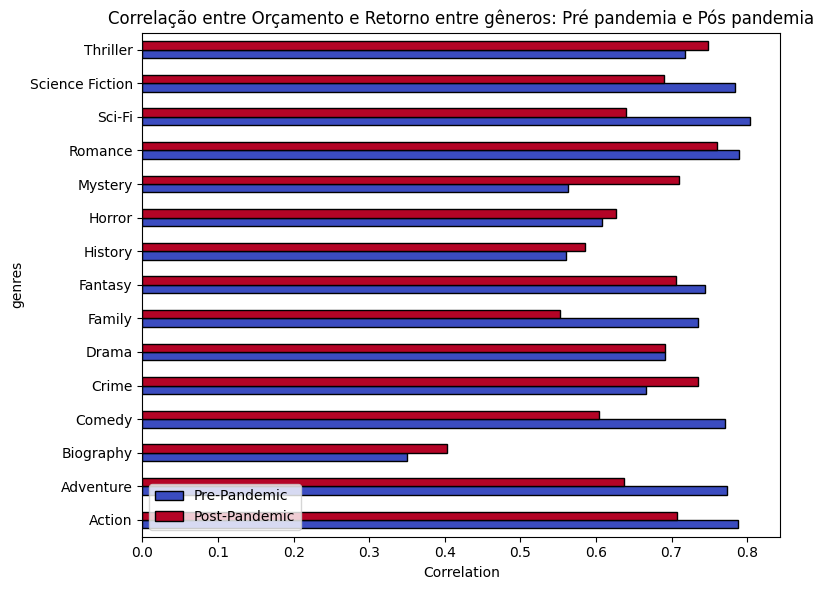

In [ ]:
# Mesmo de antes mas comparanado Pre e pos pandemia

ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]

pre_ff = ff[(ff['Year'].apply(int) < 2020)]
post_ff = ff[(ff['Year'].apply(int) >= 2020)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

pre_exploded_genre = pre_ff.explode('genres')
pre_exploded_genre = pre_exploded_genre[pre_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

post_exploded_genre = post_ff.explode('genres')
post_exploded_genre = post_exploded_genre[post_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]


pre_genre_revenue = pre_exploded_genre.groupby('genres')['budget'].corr(ff['revenue']).sort_values()
post_genre_revenue = post_exploded_genre.groupby('genres')['budget'].corr(ff['revenue']).sort_values()

df_to_plot = pd.DataFrame({
    'Pre-Pandemic': pre_genre_revenue,
    'Post-Pandemic': post_genre_revenue
})

ax = df_to_plot.plot(kind='barh', figsize=(8, 6), colormap='coolwarm', edgecolor='black')

plt.title("Correlação entre Orçamento e Retorno entre gêneros: Pré pandemia e Pós pandemia")
plt.xlabel("Correlation")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()



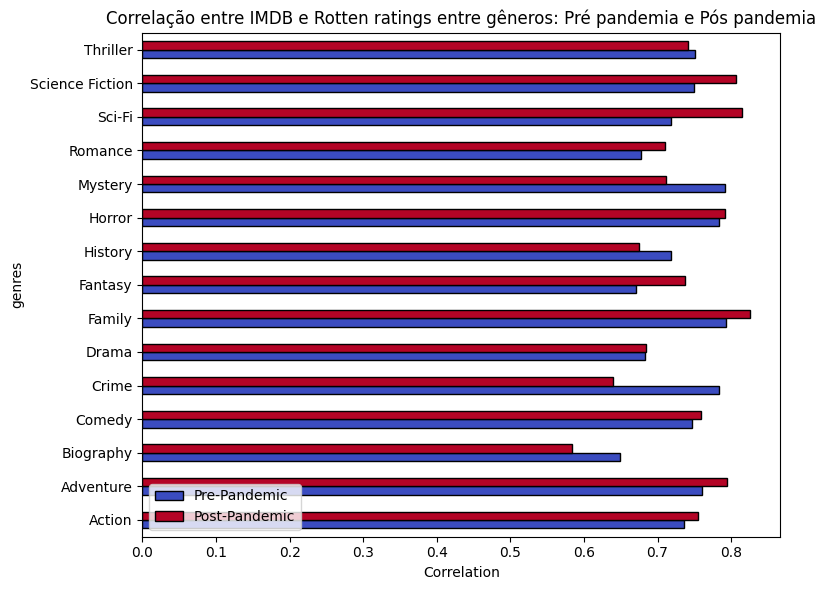

In [ ]:
# Mesmo de antes mas comparanado Pre e pos pandemia

ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]

pre_ff = ff[(ff['Year'].apply(int) < 2020)]
post_ff = ff[(ff['Year'].apply(int) >= 2020)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

pre_exploded_genre = pre_ff.explode('genres')
pre_exploded_genre = pre_exploded_genre[pre_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

post_exploded_genre = post_ff.explode('genres')
post_exploded_genre = post_exploded_genre[post_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]


pre_genre_revenue = pre_exploded_genre.groupby('genres')['imdb'].corr(ff['rotten']).sort_values()
post_genre_revenue = post_exploded_genre.groupby('genres')['imdb'].corr(ff['rotten']).sort_values()

df_to_plot = pd.DataFrame({
    'Pre-Pandemic': pre_genre_revenue,
    'Post-Pandemic': post_genre_revenue
})

ax = df_to_plot.plot(kind='barh', figsize=(8, 6), colormap='coolwarm', edgecolor='black')

plt.title("Correlação entre IMDB e Rotten ratings entre gêneros: Pré pandemia e Pós pandemia")
plt.xlabel("Correlation")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()



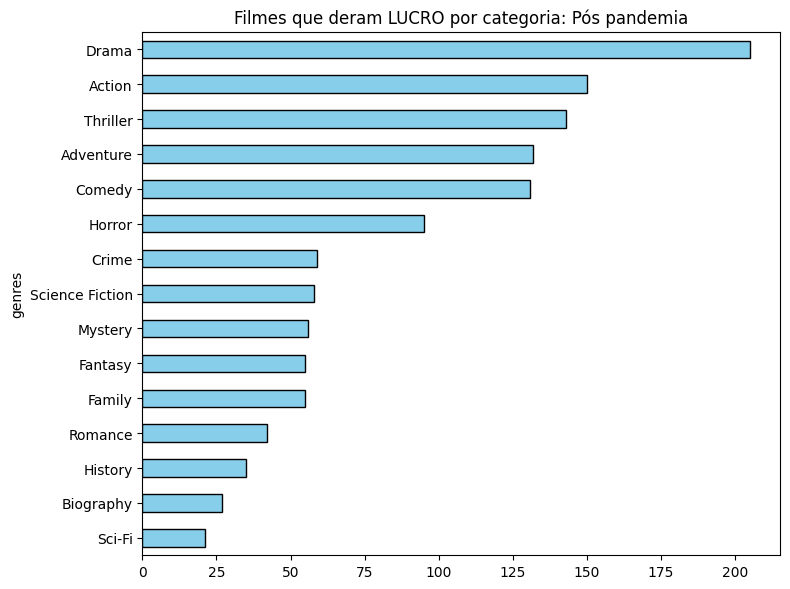

In [ ]:
# FILMES COM LUCRO POR GENERO PRE E POS PANDEMIA

ff = df[(df['revenue'] > 0) & (df['budget'] > 0) & (df['revenue'] > df['budget'])]

pre_ff = ff[(ff['Year'].apply(int) > 2020)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

pre_exploded_genre = pre_ff.explode('genres')
pre_exploded_genre = pre_exploded_genre[pre_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

pre_genre_revenue = pre_exploded_genre['genres'].value_counts().sort_values()

pre_genre_revenue.plot(kind='barh', figsize=(8, 6), color='skyblue', edgecolor='black')

plt.title("Filmes que deram LUCRO por categoria: Pós pandemia")
plt.tight_layout()
plt.show()



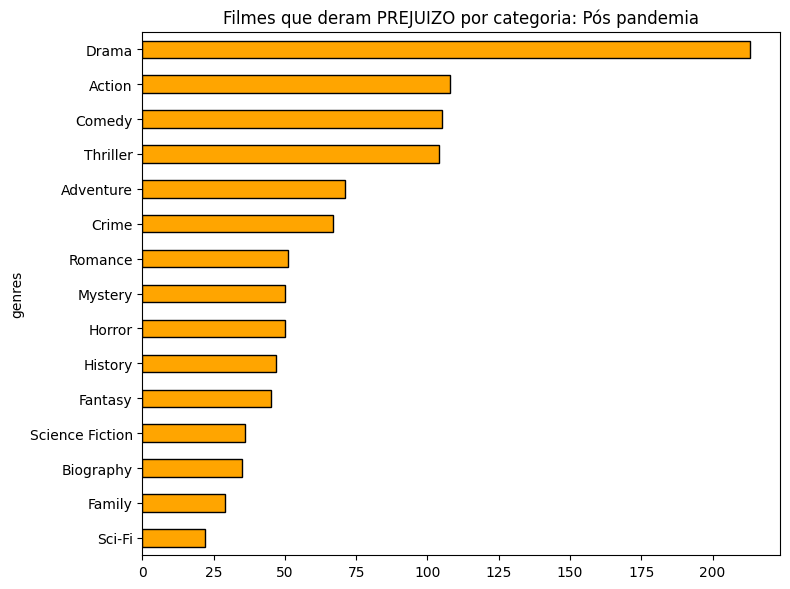

In [ ]:
# FILMES COM LUCRO POR GENERO PRE E POS PANDEMIA

ff = df[(df['revenue'] > 0) & (df['budget'] > 0) & (df['revenue'] < df['budget'])]

pre_ff = ff[(ff['Year'].apply(int) > 2020)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

pre_exploded_genre = pre_ff.explode('genres')
pre_exploded_genre = pre_exploded_genre[pre_exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

pre_genre_revenue = pre_exploded_genre['genres'].value_counts().sort_values()

pre_genre_revenue.plot(kind='barh', figsize=(8, 6), color='orange', edgecolor='black')

plt.title("Filmes que deram PREJUIZO por categoria: Pós pandemia")
plt.tight_layout()
plt.show()



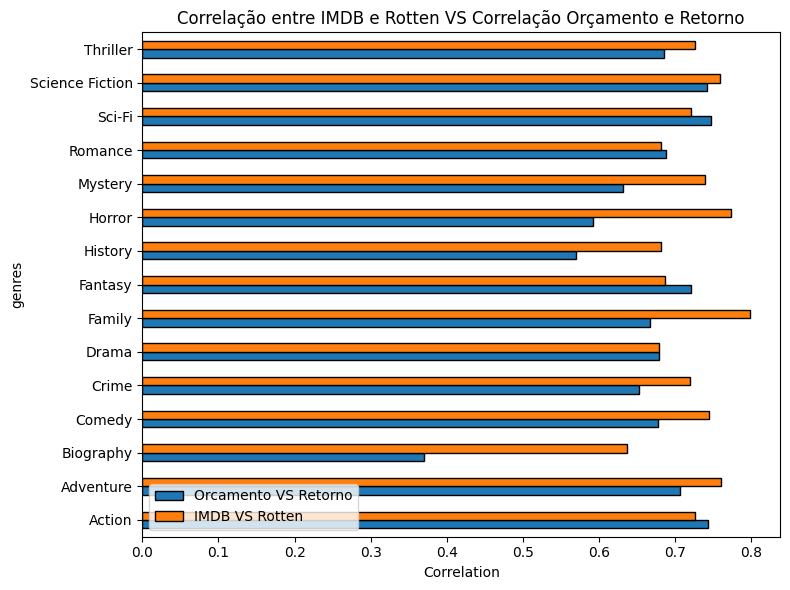

In [ ]:
# Mesmo de antes mas comparanado Pre e pos pandemia

ff = df[(df['revenue'] > 0) & (df['budget'] > 0)]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

exploded_genre = ff.explode('genres')
exploded_genre = exploded_genre[exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

genre_revenue = exploded_genre.groupby('genres')['budget'].corr(ff['revenue']).sort_values()
genre_ratings = exploded_genre.groupby('genres')['imdb'].corr(ff['rotten']).sort_values()

df_to_plot = pd.DataFrame({
    'Orcamento VS Retorno': genre_revenue,
    'IMDB VS Rotten': genre_ratings,
})

ax = df_to_plot.plot(kind='barh', figsize=(8, 6), edgecolor='black')

plt.title("Correlação entre IMDB e Rotten VS Correlação Orçamento e Retorno")
plt.xlabel("Correlation")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()



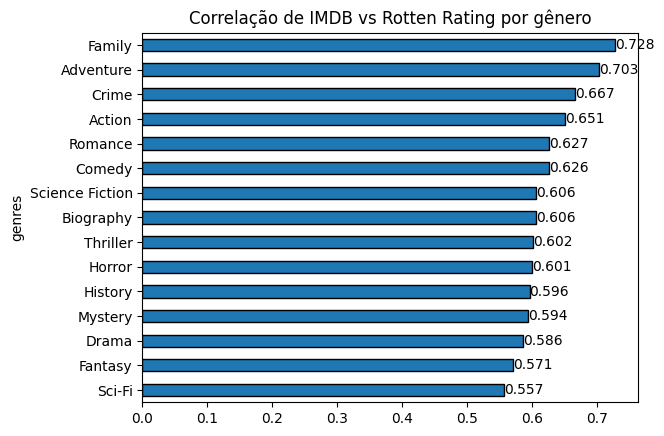

In [ ]:
ff = df[df['imdb'].notna() & df['rotten'].notna()]

most_used_genres = list(df.explode('genres')['genres'].value_counts().head(15).index)

exploded_genre = ff.explode('genres')
exploded_genre = exploded_genre[exploded_genre['genres'].apply(lambda x: x in most_used_genres)]

genre_revenue = exploded_genre.groupby('genres')['imdb'].corr(ff['rotten']).sort_values()
ax = genre_revenue.plot(kind='barh', title="Correlação de IMDB vs Rotten Rating por gênero", edgecolor='black')
for i, v in enumerate(genre_revenue):
    ax.text(v, i, f'{v:.3f}', va='center')
plt.show()




<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

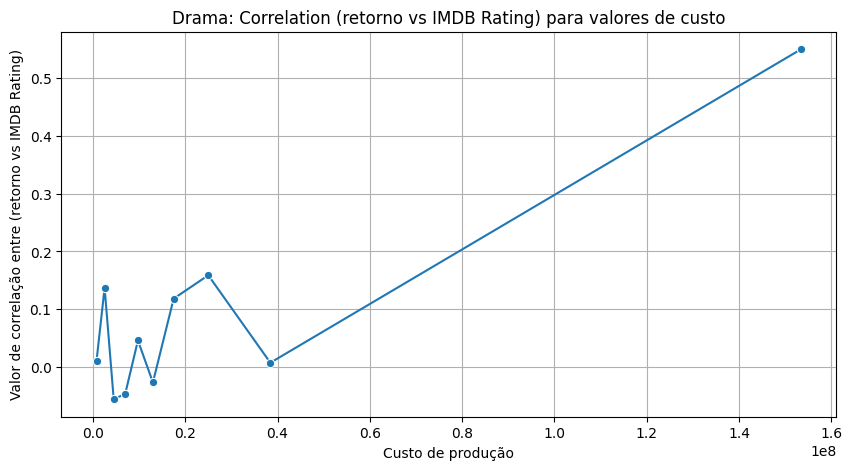

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

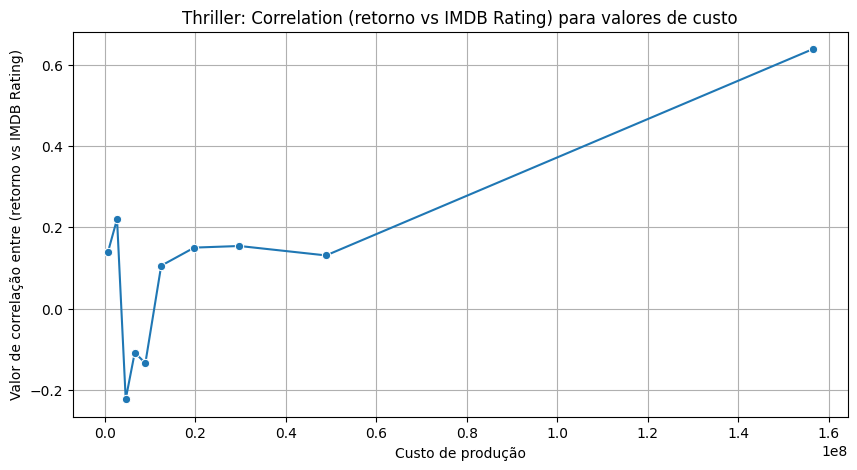

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

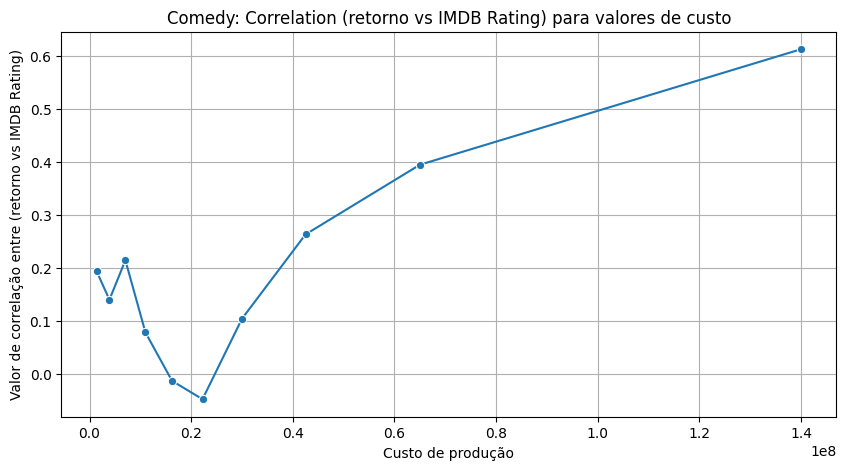

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

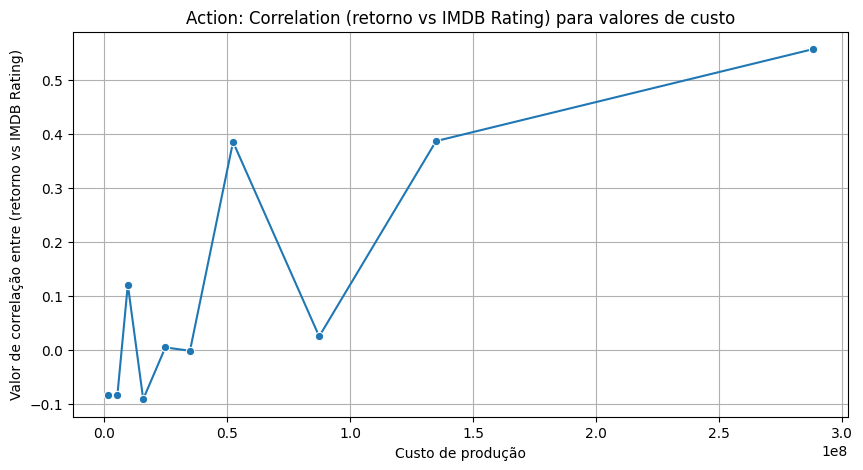

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

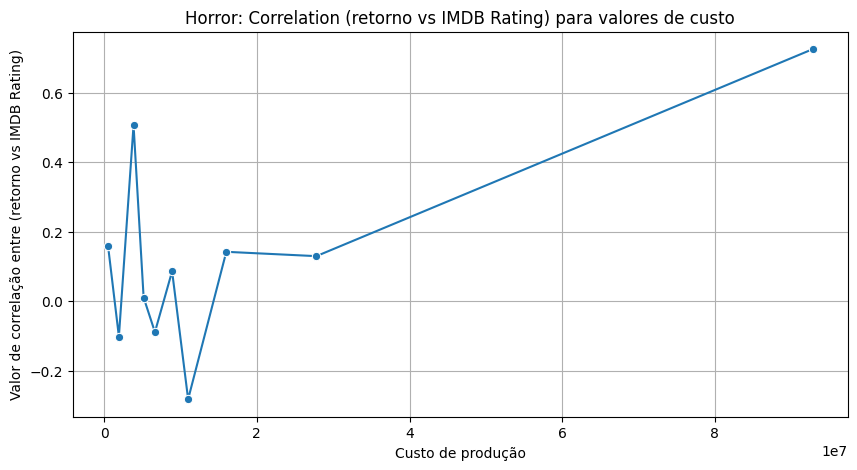

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

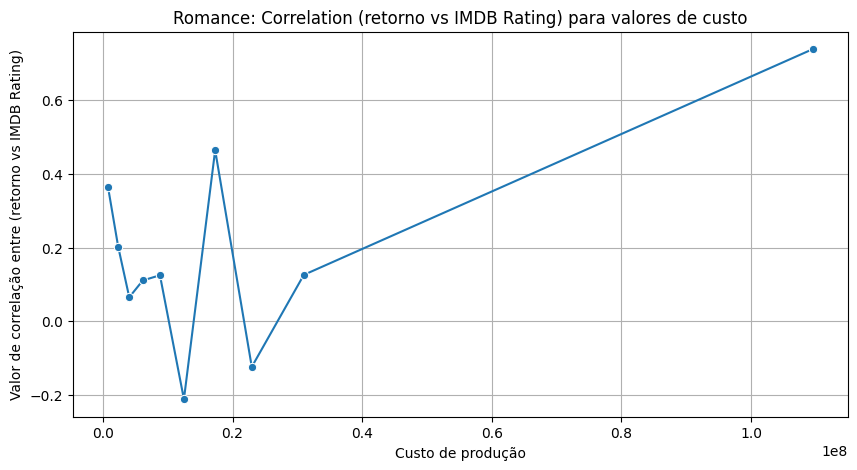

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

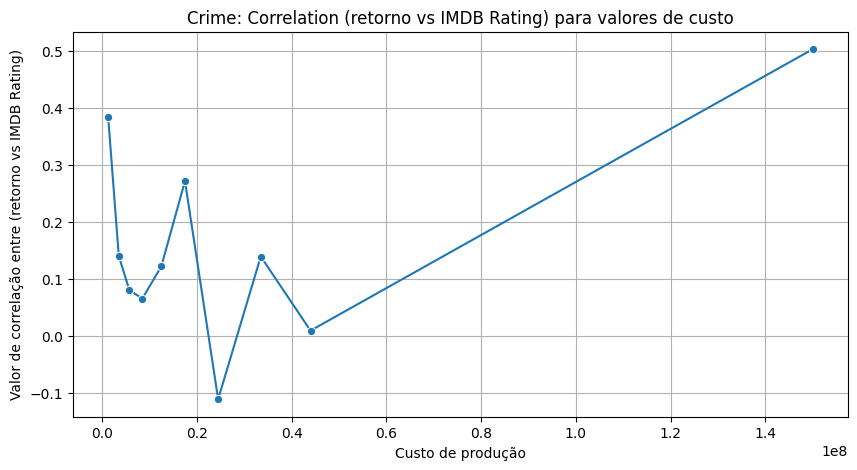

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

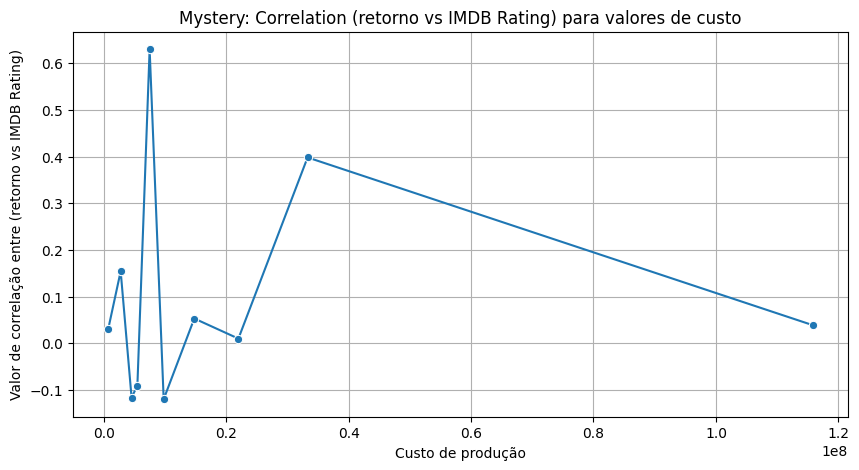

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

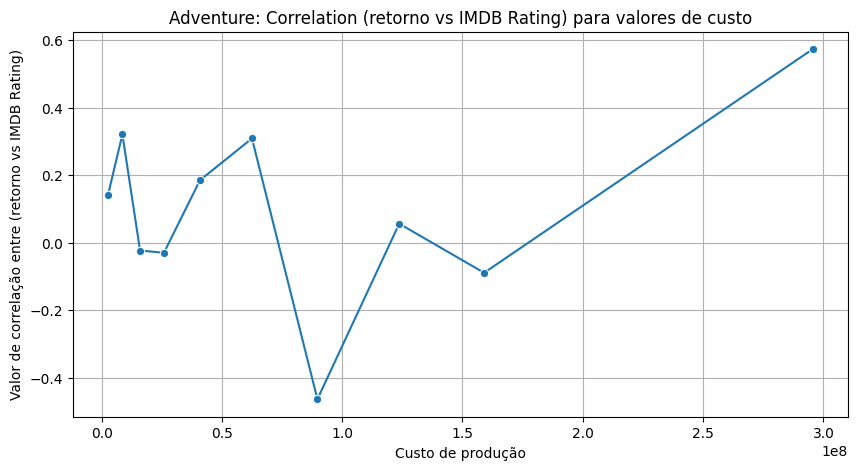

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

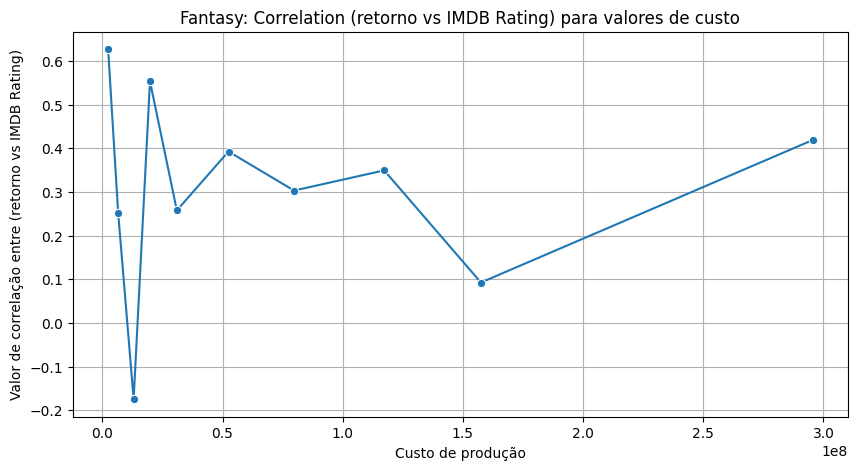

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

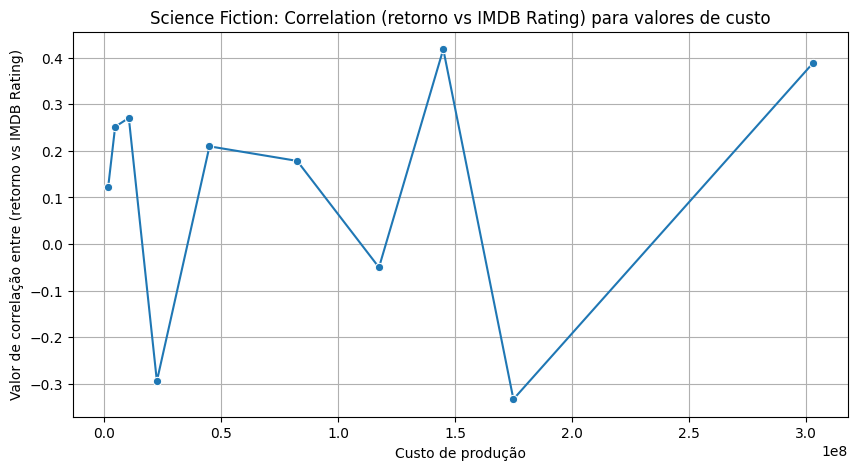

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

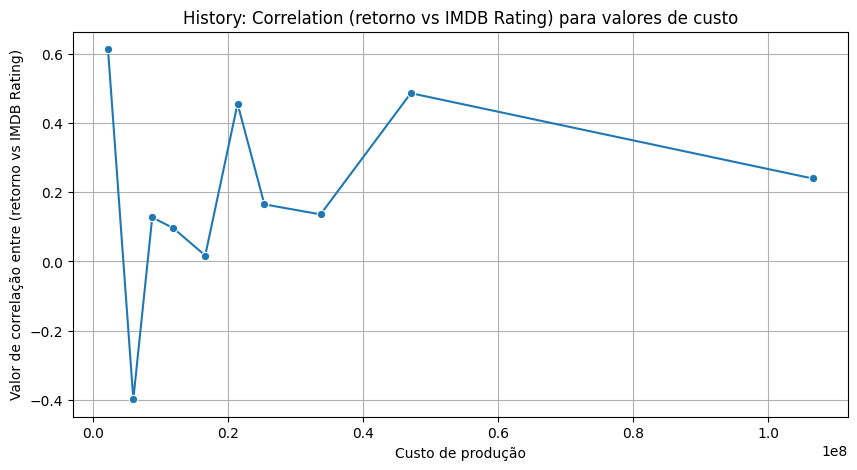

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

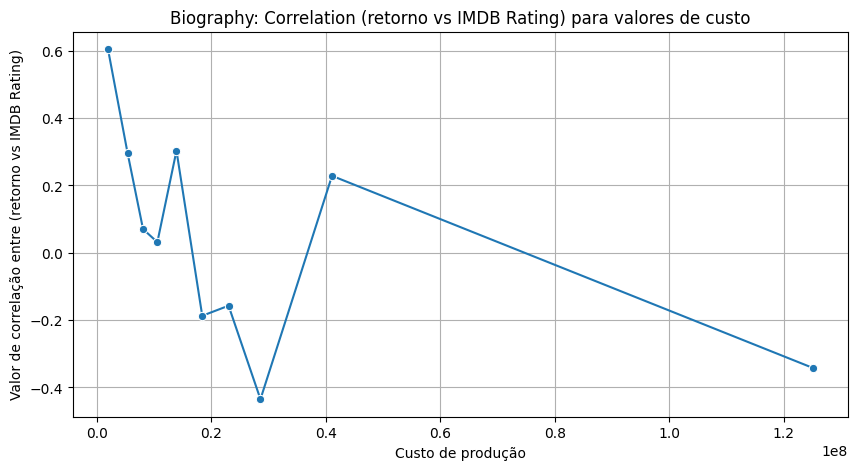

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

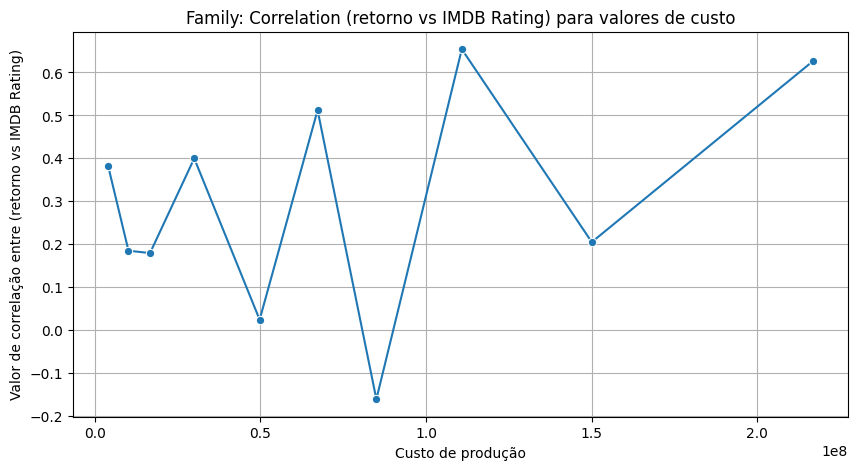

<ipython-input-160-1688f0df587e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
<ipython-input-160-1688f0df587e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)
<ipython-input-160-1688f0df587e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

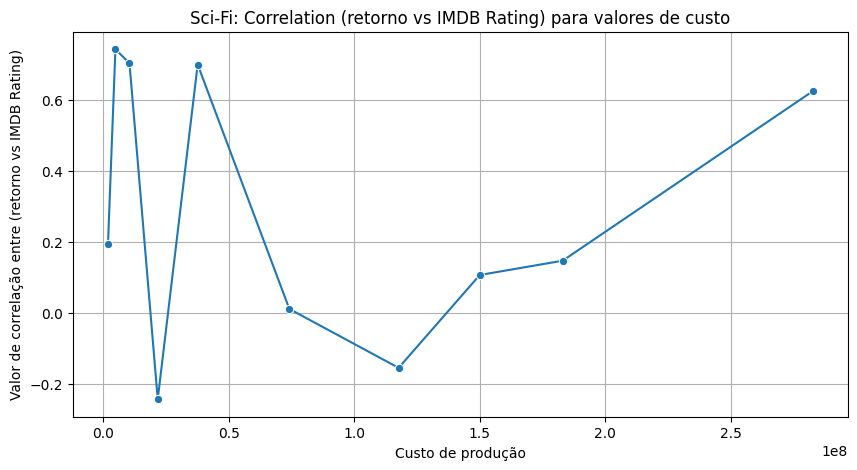

In [ ]:
for genre in most_used_genres:
  filtered = ff[ff['genres'].apply(lambda x: genre in x)]

  filtered['bin'] = pd.qcut(filtered['budget'], q=10)
  filtered['bin_mid'] = filtered['bin'].apply(lambda x: x.mid)

  # Compute correlation in each bin
  grouped_corr = filtered.groupby('bin_mid').apply(lambda g: g['budget'].corr(g['revenue'])).reset_index()
  grouped_corr.columns = ['bin_mid', 'correlation']
  plt.figure(figsize=(10, 5))
  sns.lineplot(data=grouped_corr, x='bin_mid', y='correlation', marker='o')
  plt.title(f'{genre}: Correlation (retorno vs IMDB Rating) para valores de custo')
  plt.xlabel('Custo de produção')
  plt.ylabel('Valor de correlação entre (retorno vs IMDB Rating)')
  plt.grid(True)
  plt.show()


  #n = len(quantiles)

  #fig, axes = plt.subplots(1, n, figsize=(5 * n, 4), constrained_layout=True)

  #for i, q in enumerate(quantiles):
      #subset = filtered[(filtered['quantile'] == q)]
      # corr = subset.corr()

      #ax = axes[i]
      #subset.plot(kind='scatter', x='budget', y='imdb', ax=ax)
      #ax.set_title(f'Budget: ({int(bins[i]):,} ... {int(bins[i + 1]):,})')

  # filtered.plot(kind='scatter', x='budget', y='revenue')
  # plt.suptitle(f'Correlations by {genre} movies', fontsize=16, y=1.05)
  # plt.show()

# Budget e Avaliação

# Retorno e Avaliação